# Lab 10

### Problem 1

##### Neural networks can be used to classify galaxies.

##### **a) Load the data you need to train and test the galNet network presented in the lecture.**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image as image
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay # Using the sklearn library for visualisation of the Confusion Matrix

2023-12-20 13:29:40.043471: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 13:29:40.043499: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 13:29:40.043514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 13:29:40.048076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Segment provided by Convolutional Layers

data = open("galaxies/efigi.dat","r")  # Access galaxy images

names = [] 
types = []

for line in data:
    fields = line.split(" ")
    names.append( fields[0] )
    types.append( fields[1] )
    
nData = len(names)
imgSize = 128

galaxies = np.zeros((nData,imgSize,imgSize,3))
labels = np.zeros(nData, dtype='int')

# Creation of data arrays and iterating though the folder of images

for i in range(nData):
    filename = "galaxies/png/"+str(names[i])+".png"
    img = image.open(filename)

    imgResized = img.resize(size=(imgSize,imgSize))
    imgArr = np.array(imgResized)

    imgArr = imgArr/255.
    
    galaxies[i,:,:,:] = imgArr 
    labels[i] = types[i]

split = 955

trainGalaxies = galaxies[:split,:,:,:]
trainLabels = labels[:split]

testGalaxies = galaxies[split+1:nData-1,:,:,:]
testLabels = labels[split+1:nData-1]

np.save("galaxies/trainGalaxies.npy", trainGalaxies)
np.save("galaxies/trainLabels.npy", trainLabels)

np.save("galaxies/testGalaxies.npy", testGalaxies)
np.save("galaxies/testLabels.npy", testLabels)

# Configuring network
galNet = keras.Sequential([
    keras.layers.Conv2D(96, (6, 6), activation='relu', input_shape=(imgSize,imgSize,3)),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

galNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 123, 123, 96)      10464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 41, 41, 96)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 161376)            0         
                                                                 
 dense_2 (Dense)             (None, 24)                3873048   
                                                                 
 dense_3 (Dense)             (None, 3)                 75        
                                                                 
Total params: 3883587 (14.81 MB)
Trainable params: 3883587 (14.81 MB)
Non-trainable params: 0 (0.00 Byte)
______________

##### **b) Train your network for up to 50 epochs and use the history object it returns to create a plot of its performance as a function of the number of epochs.**

In [16]:
# Compiling network
galNet.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# Training and initialising history object
history = galNet.fit(trainGalaxies, trainLabels, validation_data = (testGalaxies, testLabels), epochs = 50)

Epoch 1/50


30/30 [==============================] - 2s 23ms/step - loss: 0.8187 - accuracy: 0.6471 - val_loss: 0.6405 - val_accuracy: 0.6975
Epoch 2/50
30/30 [==============================] - 0s 10ms/step - loss: 0.4781 - accuracy: 0.7927 - val_loss: 0.5036 - val_accuracy: 0.7815
Epoch 3/50
30/30 [==============================] - 0s 10ms/step - loss: 0.3313 - accuracy: 0.8838 - val_loss: 0.4126 - val_accuracy: 0.8487
Epoch 4/50
30/30 [==============================] - 0s 10ms/step - loss: 0.2413 - accuracy: 0.9110 - val_loss: 0.5358 - val_accuracy: 0.7563
Epoch 5/50
30/30 [==============================] - 0s 10ms/step - loss: 0.2009 - accuracy: 0.9277 - val_loss: 0.3106 - val_accuracy: 0.8739
Epoch 6/50
30/30 [==============================] - 0s 10ms/step - loss: 0.1372 - accuracy: 0.9518 - val_loss: 0.3320 - val_accuracy: 0.8655
Epoch 7/50
30/30 [==============================] - 0s 10ms/step - loss: 0.0916 - accuracy: 0.9738 - val_loss: 0.4036 - val_accuracy: 0.8403
Epoch 8/50
30/30 [======

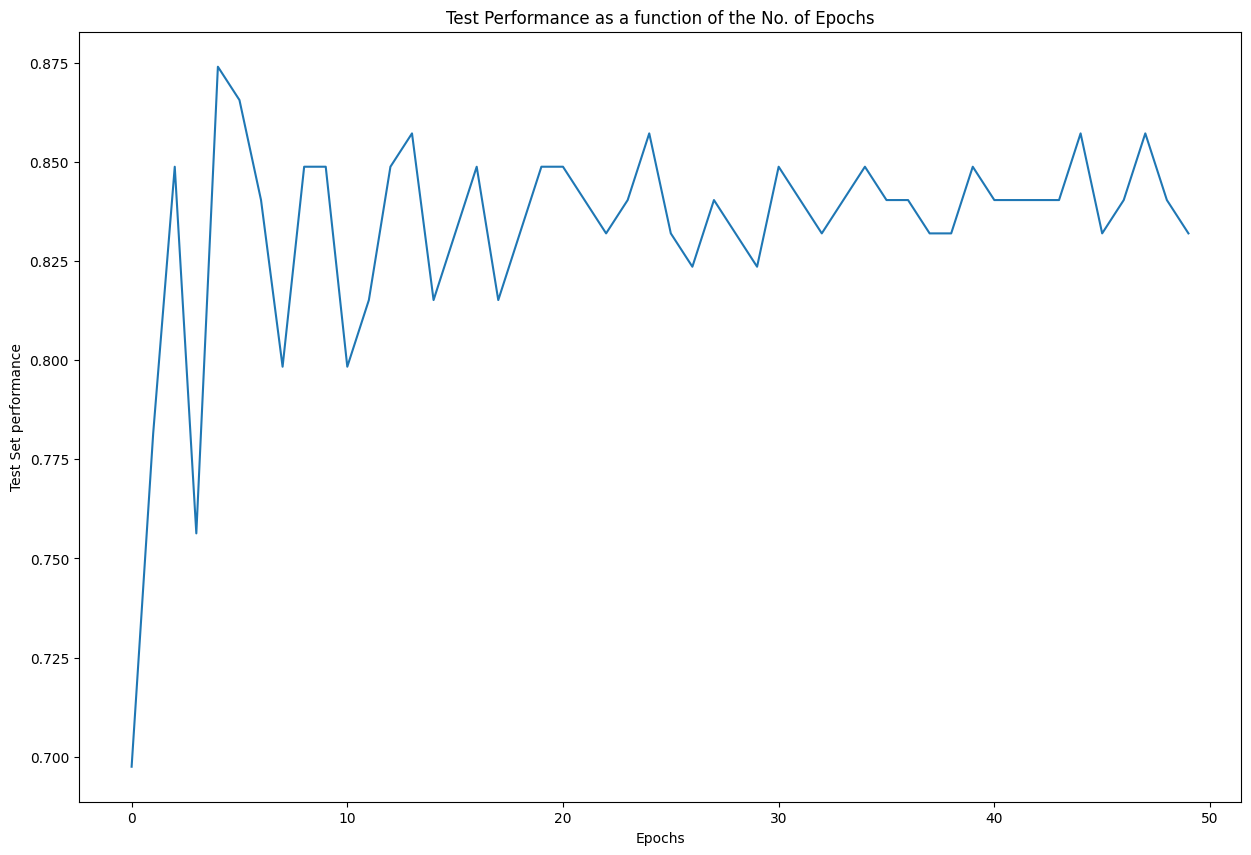

In [17]:
plt.figure(figsize=(15,10))
plt.title("Test Performance as a function of the No. of Epochs")
plt.xlabel("Epochs")
plt.ylabel("Test Set performance")
plt.plot(history.history['val_accuracy'])
plt.savefig("galnet_performance.pdf")
plt.show()

##### **c) What’s the per-class performance of your network, i.e. the number of ellipticals, spirals and irregulars it classified correctly? Compare that with the distribution of training and test images. Furthermore, browse through the training images and discuss potential issues that have a negative effect on the training efficiency.**

4/4 [==============================] - 0s 3ms/step
tf.Tensor(
[[28  2  0]
 [ 7 48  5]
 [ 0  6 23]], shape=(3, 3), dtype=int32)
4/4 [==============================] - 0s 3ms/step


<Figure size 800x600 with 0 Axes>

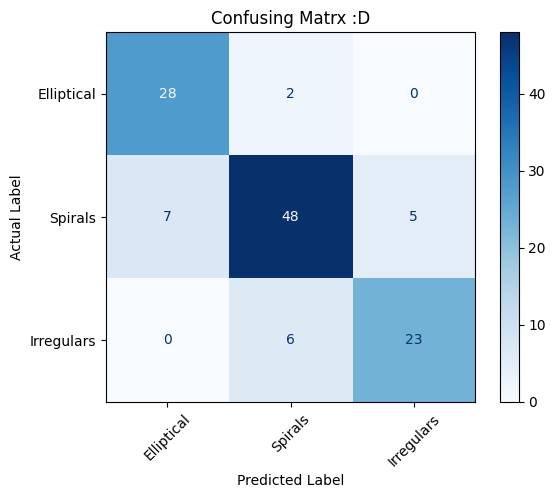

In [18]:
# Function for Confusion Matrix developed in Lab 9 for improved readability
def confusion_matrix(model, test_images, test_labels, item):
    predictions = model.predict(test_images)                                    # Call predict function, to predict which label belongs to which item 
    predicted_labels = np.argmax(predictions, axis = 1)                         # Determine the highest predicted values (labels) with indices by looking at the max values of the predicitons array
                                                                                # Indices from argmax will match the predicted labels for the items 

    confusing_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)  # Compute the confusion matrix
    confusing_matrix_array = np.array(confusing_matrix)                         # Convert the matrix into a numpy array for easier handling

    plt.figure(figsize = (8,6)) # Creating a plot for improved visualisation of the confusing matrix
    visualize_matrix = ConfusionMatrixDisplay(confusing_matrix_array, display_labels = item)  # Initialise a ConfusionMatrixDisplay object for better visibility
    visualize_matrix.plot(cmap = plt.cm.Blues)  # Plotting the matrix with a colourmap of different blue shades
    plt.title("Confusing Matrx :D")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.xticks(rotation = 45)  # X-axis labels rotated
    plt.show()

predictions = galNet.predict(testGalaxies)
predictedLabels = np.array( [np.argmax( vec ) for vec in predictions] )
res = tf.math.confusion_matrix(testLabels,predictedLabels)
print(res)

galaxy_types = ["Elliptical", "Spirals", "Irregulars"]
confusion_matrix(galNet, testGalaxies, testLabels, galaxy_types)

In [19]:
train_distribution = dict(zip(galaxy_types, np.bincount(trainLabels)))  # Calculate distribution of classes in training and test data
test_distribution = dict(zip(galaxy_types, np.bincount(testLabels)))

print(f"Training Data Distribution: {train_distribution}")
print(f"Test Data Distribution: {test_distribution}")


Training Data Distribution: {'Elliptical': 238, 'Spirals': 515, 'Irregulars': 202}
Test Data Distribution: {'Elliptical': 30, 'Spirals': 60, 'Irregulars': 29}


- Elliptical: 28/30
- Spirals: 48/60
- Irregulars: 23/29

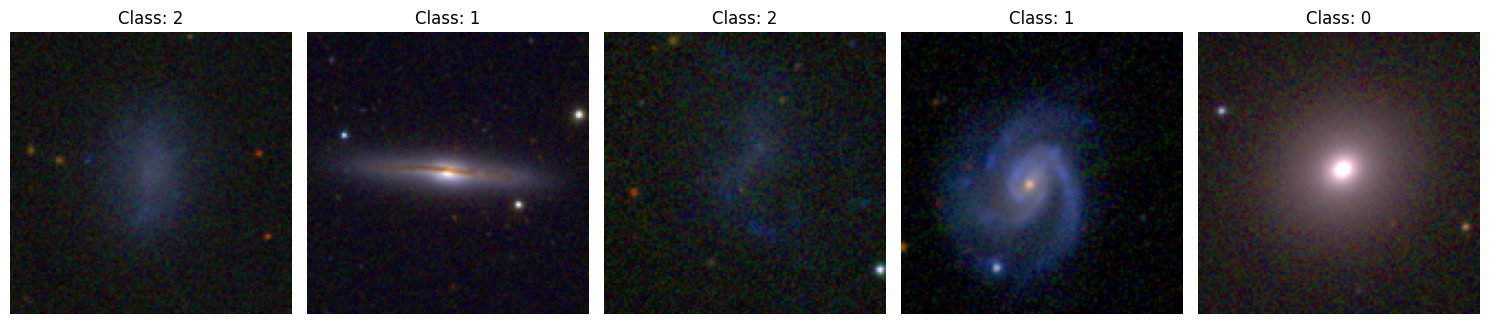

In [21]:
def plot_images(images, labels, num_images = 5):
    fig, axes = plt.subplots(1, num_images, figsize = (15, 5))

    for i in range(num_images):
        idx = np.random.randint(0, len(images))
        axes[i].imshow(images[idx])
        axes[i].set_title("Class: " + str(labels[idx]))
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

plot_images(trainGalaxies, trainLabels)  # Displaying a selection of images from the training dataset to look at

Recall: 
- Class 0: elliptical galaxies
- Class 1: spirals galaxies 
- Class 2: irregulars galaxies

Browsing the selection of galaxy images, it is clear due to the quality and contrast of several of the images, that a number of galaxies are difficult to classify. Examining the confusion matrix of the training dataset, it is clear that the spiral galaxy, although with the highest number of images of 60 in the training set, is most likely to be incorrectly predicted. This is likely due to the shapes and characteristics of this galaxy class being lost or diminished in due to the perspective of the image, lower quality or low contrast.

<p style = "text-align: center;">
    <img src= "/home/nnds7b/Lab_10/Types_of_Galaxies.png" alt= "Types of Galaxies">
</p>
<p style = "text-align: center;">
    Figure 1. Types of galaxies
</p>

Source: https://www.open.edu/openlearn/mod/oucontent/view.php?id=2195&extra=thumbnailfigure_idm373


##### **d) Explain which kinds of image augmentation, i.e. simple image manipulations such as rotations, flips or shifts, could be applied to pictures of galaxies.**

The role of image augmentation in regard to neural networks, is to allow us to create or diversify new training examples from the images that we already have available to us. This can be performed by transforming the existing images in a number of ways, for example:
- Rotations: rotating images to display a different orientation. For galaxies, a different rotation can represent different angles from our persepctive that we observe the galaxy. As galaxies have different orientations in space, this is useful to train the network,
- Flipping: we can flip an image vertically or horizontally to change its orientation (e.g. facing left or right). For galaxies, flipping the image will change how it appears to be orientated in space.
- Shifting: performing a shift on an image can change the postion or alignment of the object/subject of the image, this provides the network with differents in how the image is spatially arranged. For galaxies we can shift the oberserable field of an image to increase the testing set for a slightly altered persepctive of an original image.
- Zooming/Cropping: by zooming in or out/cropping images we can focus on specific regions. This allows us to focus on a particular characteristic of a galaxy and enable a network to learn to distinguish features of interest at different scales.
- Saturation: by altering the colour of an image we can account for variations in imaging equipment or setting. This can enable us to capture galaxies with different color profiles during training.
- Contrast: by modifying the brightness, contrast, or using a filter we can simulate different conditions of observation or image quality. This can serve as a realistic training set for galaxies, as images provided to a network in reality may be of different quality and contrasts.

It is worth noting that applying image augmentation can alter the structure of an image, e.g. for spiral galaxies, trasnforming the characteristics that make the image recongisable leading to incorrect predictions. Therefore, it is important to be aware of the effect of these augmentations on the images being tested.

Source: https://albumentations.ai/docs/introduction/image_augmentation/

### Problem 2

##### On the last problem sheet, the optional task revolved around a greyscale version of the famous CIFAR-10 dataset. Now that we learned to deal with convolutional and pooling layers, we are ready to tackle the color version.

##### **a) To load the dataset use:**

*<p style="text-align: center;">( trainImages , trainLabels ) ,( testImages , testLabels ) = keras . datasets . cifar10 . load_data ()</p>*

In [3]:
(trainImages_cifar, trainLabels_cifar), (testImages_cifar, testLabels_cifar) = keras.datasets.cifar10.load_data()

trainLabels_cifar.shape, trainLabels_cifar.shape, testImages_cifar.shape, testLabels_cifar.shape  # Checking loaded data

trainImages_cifar = trainImages_cifar.astype('float32') / 255.0  # Normalise training images
testImages_cifar = testImages_cifar.astype('float32') / 255.0    # Normalise test images

##### **b) Create a network with the following architecture:**
- A convolutional layer with 32 filters, a (3,3) kernel and relu activation
- A max-pooling layer with (2,2) binning
- A convolutional layer with 64 filters, a (3,3) kernel and relu activation
- A max-pooling layer with (2,2) binning
- A flattening layer
- A dense layer with 64 nodes and relu activation
- A softmaxed output layer

In [4]:
cnn_cifar_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

cnn_cifar_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

cnn_cifar_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

2023-12-19 11:12:04.105447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 11:12:04.111419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 11:12:04.111628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

##### **c) Compile and train your network for up to 20 epochs.**

In [11]:
history = cnn_cifar_model.fit(trainImages_cifar, trainLabels_cifar, epochs=20, validation_data=(testImages_cifar, testLabels_cifar))

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8958 - val_loss: 1.3646 - val_accuracy: 0.6756
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2724 - accuracy: 0.9025 - val_loss: 1.4744 - val_accuracy: 0.6783
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9077 - val_loss: 1.5714 - val_accuracy: 0.6636
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2409 - accuracy: 0.9129 - val_loss: 1.6337 - val_accuracy: 0.6675
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2311 - accuracy: 0.9172 - val_loss: 1.6764 - val_accuracy: 0.6729
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2125 - accuracy: 0.9244 - val_loss: 1.7493 - val_accuracy: 0.6689
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2013 - accuracy: 0.9275 - val_loss: 1.7740 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 2.7165 - accuracy: 0.6628
Network performance: 0.6628000140190125


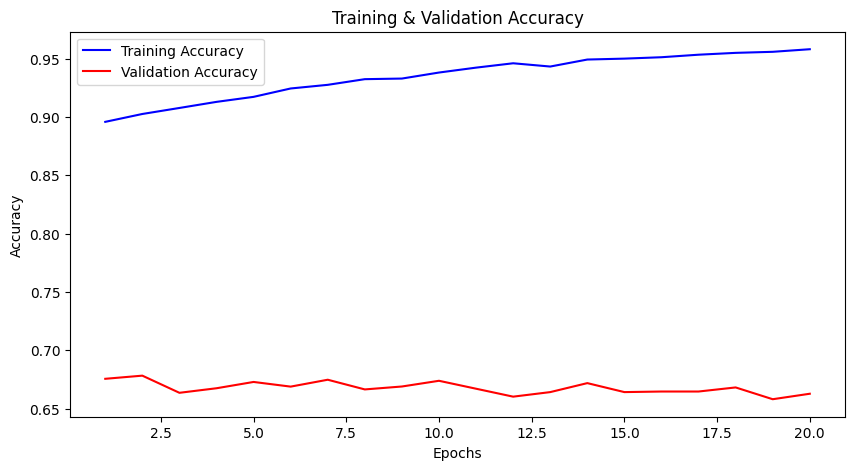

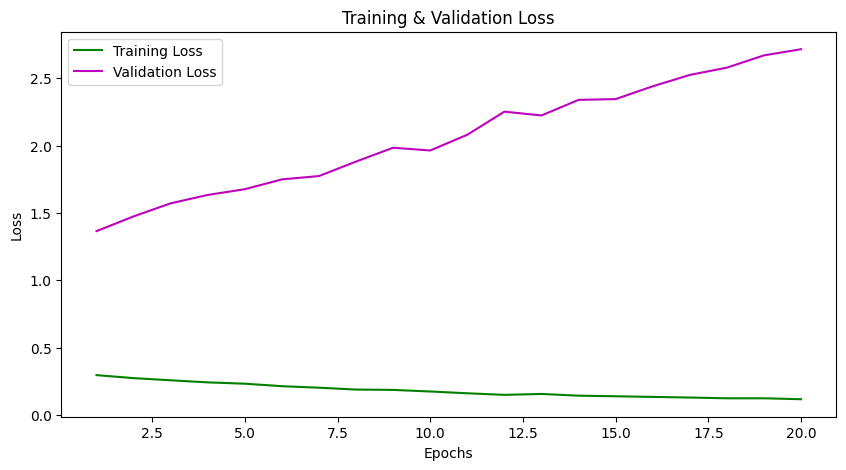

In [12]:
testLoss, testAcc = cnn_cifar_model.evaluate(testImages_cifar, testLabels_cifar) 

print('Network performance:', testAcc)

history_accuracy = history.history["accuracy"]                # Extracing history object data for evaluation
history_validation = history.history["val_accuracy"]
history_training_loss = history.history["loss"]
hisotry_validation_loss = history.history["val_loss"]
epochs = range(1, len(history_accuracy) + 1)

plt.figure(figsize = (10, 5))
plt.plot(epochs, history_accuracy, "b", label = "Training Accuracy")
plt.plot(epochs, history_validation, "r", label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(epochs, history_training_loss, "g", label = "Training Loss")
plt.plot(epochs, hisotry_validation_loss, "m", label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

##### **d) Explain which kinds of image augmentation could be applied to this dataset.**

In regards to the CIFAR-10 dataset, we could make use of a number of image augmentation techniques that could be applied to the dataset to enhance the models generalization ability (capacity of a model to produce reasonable outputs for inputs that aren't encountered during the training phase. Source: https://www.sciencedirect.com/topics/computer-science/generalization-ability). For example:

- Flips (Horizontal or Vertical):
    applying random horizontal or vertical flips can help the model generalize better by considering variations in object orientation.

- Rotations:
    introducing rotations (within a certain degree range) simulates variations in the viewpoint of objects.

- Zooming & Cropping:
    zooming in/out or cropping images can enable the model to learn from different scales and viewpoints.

- Contrast:
    modifying brightness, contrast, or applying filters can help the model generalize to different lighting conditions.

- Shifts:
    shifting images horizontally or vertically can simulate slight changes in object position within the image.

# Problem 3

##### Neural networks are used in medicine to assist doctors in their everyday work. One application is the detection of bacterial pneunomia in chest x-ray scans. xray.zip contains a total of 5860 scans divided into a training, validation and test data set, each containing a NORMAL folder with healthy lungs and PNEUNOMIA folder with infected lungs. In your notebook you could use something like:

*<p style="text-align: center;">from os import listdir</p>*
*<p style="text-align: center;">from os . path import isfile , join</p>*
*<p style="text-align: center;">path = " train / NORMAL / "</p>*
*<p style="text-align: center;">scanNames = [ f for f in listdir ( path ) if isfile ( join ( path , f ) ) ]</p>*

##### To generate a list of all images in a given folder. Get the data into appropriate arrays and set up a network. Because we’re dealing with just a single color channel, You will have to add a fake fourth dimension using np.expand_dims if you plan to include standard 2D convolutional layers in your network - which you definitely should. Experiment with different networks starting with something similar to the CIFAR-10 net, but adjust the convolutional layers to take into account the larger image size. Can you push your network to trustworthy diagnostic performances? Note: Getting to this point is very hard ... anything better than 50% is a win.

In [2]:
import cv2
from os import listdir
from os.path import isfile, join

In [3]:
test_path_normal = "/home/nnds7b/xray/test/NORMAL"
test_path_pneumonia = "/home/nnds7b/xray/test/PNEUMONIA"
scanNames_test_normal = [f for f in listdir(test_path_normal) if isfile(join(test_path_normal, f))]
scanNames_test_pneumonia = [f for f in listdir(test_path_pneumonia) if isfile(join(test_path_pneumonia, f))]

train_path_normal = "/home/nnds7b/xray/train/NORMAL"
train_path_pneumonia = "/home/nnds7b/xray/train/PNEUMONIA"
scanNames_train_normal = [f for f in listdir(train_path_normal) if isfile(join(train_path_normal, f))]
scanNames_train_pneumonia = [f for f in listdir(train_path_pneumonia) if isfile(join(train_path_pneumonia, f))]

val_path_normal = "/home/nnds7b/xray/val/NORMAL"
val_path_pneumonia = "/home/nnds7b/xray/val/PNEUMONIA"
scanNames_val_normal = [f for f in listdir(val_path_normal) if isfile(join(val_path_normal, f))]
scanNames_val_pneumonia = [f for f in listdir(val_path_pneumonia) if isfile(join(val_path_pneumonia, f))]

In [4]:
def load_images(file_paths):
    images = []
    for path in file_paths:
        img = cv2.imread(path)                           # Utilising cv2 library for image loading and manipulation
                                                         # imread will load an image from a file
        if img is not None and not img.size == 0:        # Condition to check if an image is empty or not
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale (already greyscale, but double check)
                                                         # cvtColor converts an image from one colour space to another
            img = cv2.resize(img, (128, 128))            # Resize images to all be the same size (although they should be)
            images.append(img)
    return np.array(images)

# Source for opencv (cv2): https://docs.opencv.org/3.4/index.html

# Loading images for training, validation, & testing using code cell above variables
train_normal_images = load_images([join(train_path_normal, f) for f in scanNames_train_normal])
train_pneumonia_images = load_images([join(train_path_pneumonia, f) for f in scanNames_train_pneumonia])

val_normal_images = load_images([join(val_path_normal, f) for f in scanNames_val_normal])
val_pneumonia_images = load_images([join(val_path_pneumonia, f) for f in scanNames_val_pneumonia])

test_normal_images = load_images([join(test_path_normal, f) for f in scanNames_test_normal])
test_pneumonia_images = load_images([join(test_path_pneumonia, f) for f in scanNames_test_pneumonia])

xray_training_images = np.concatenate((train_normal_images, train_pneumonia_images))  # Concatenating/merge images for to one array for training, validation, & testing
xray_val_images = np.concatenate((val_normal_images, val_pneumonia_images))
xray_test_images = np.concatenate((test_normal_images, test_pneumonia_images))

xray_train_label = np.concatenate((np.zeros(len(train_normal_images)), np.ones(len(train_pneumonia_images)))) # Concatenating/merge labels and classify them as 0 (normal) and 1 (pneumonia)
xray_val_label = np.concatenate((np.zeros(len(val_normal_images)), np.ones(len(val_pneumonia_images))))
xray_test_label = np.concatenate((np.zeros(len(test_normal_images)), np.ones(len(test_pneumonia_images))))

xray_training_images = np.expand_dims(xray_training_images, axis = -1)  # Adding the fake fourth dimension for grayscale images using np.expand_dims
xray_val_images = np.expand_dims(xray_val_images, axis = -1)
xray_test_images = np.expand_dims(xray_test_images, axis = -1)

xray_training_images = xray_training_images.reshape(-1, 128, 128, 1)  # Reshape images to fit the model input shape, with grayscale
xray_val_images = xray_val_images.reshape(-1, 128, 128, 1)
xray_test_images = xray_test_images.reshape(-1, 128, 128, 1)
# Reshaping parameters: -1 (maintain same size as original array), 128x128 (pixel width and height), and 1 (channel dimension, for greyscale)

xray_training_images = xray_training_images / 255.0  # Normalise images
xray_val_images = xray_val_images / 255.0
xray_test_images = xray_test_images / 255.0

In [5]:
# Receiving nan values for validation loss and loss nan valued
# Troubleshooting data preparations: 

nan_check_train = np.isnan(xray_training_images)  # Checking for nan values in the image arrays
nan_check_val = np.isnan(xray_val_images)
nan_check_test = np.isnan(xray_test_images)

print("NaN check in training images:", np.any(nan_check_train))
print("NaN check in validation images:", np.any(nan_check_val))
print("NaN check in test images:", np.any(nan_check_test))

print("Training labels shape:", xray_train_label.shape)  # Checking the shape and data type of the label arrays
print("Validation labels shape:", xray_test_label.shape)
print("Training labels data type:", xray_train_label.dtype)
print("Validation labels data type:", xray_test_label.dtype)

NaN check in training images: False
NaN check in validation images: False
NaN check in test images: False
Training labels shape: (5216,)
Validation labels shape: (624,)
Training labels data type: float64
Validation labels data type: float64


In [6]:
unique_train_labels, counts_train = np.unique(xray_train_label, return_counts=True)  # Checking unique labels and their distribution in training and validation sets
unique_val_labels, counts_val = np.unique(xray_test_label, return_counts=True)

print("Unique labels in training data:", unique_train_labels)
print("Label distribution in training data:", dict(zip(unique_train_labels, counts_train)))

print("Unique labels in validation data:", unique_val_labels)
print("Label distribution in validation data:", dict(zip(unique_val_labels, counts_val)))


Unique labels in training data: [0. 1.]
Label distribution in training data: {0.0: 1341, 1.0: 3875}
Unique labels in validation data: [0. 1.]
Label distribution in validation data: {0.0: 234, 1.0: 390}


In [11]:
# Designing the model
xray_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),                              # Prevent overfitting at a 0.5 rate (float between 0 and 1 to define input units to drop)
    keras.layers.Dense(1, activation = "sigmoid")
])

# Dropout functionality source: https://keras.io/api/layers/regularization_layers/dropout/

# Compiling the model
xray_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [12]:
# Training the model
xray_history = xray_model.fit(xray_training_images, xray_train_label, validation_data = (xray_test_images, xray_test_label), epochs = 10)

Epoch 1/10
163/163 [==============================] - 2s 7ms/step - loss: 0.2651 - accuracy: 0.8894 - val_loss: 1.0186 - val_accuracy: 0.7003
Epoch 2/10
163/163 [==============================] - 1s 6ms/step - loss: 0.1265 - accuracy: 0.9555 - val_loss: 1.1413 - val_accuracy: 0.7147
Epoch 3/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0997 - accuracy: 0.9643 - val_loss: 1.2901 - val_accuracy: 0.7340
Epoch 4/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0722 - accuracy: 0.9732 - val_loss: 0.7866 - val_accuracy: 0.7917
Epoch 5/10
163/163 [==============================] - 1s 7ms/step - loss: 0.0670 - accuracy: 0.9768 - val_loss: 1.2182 - val_accuracy: 0.7468
Epoch 6/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9814 - val_loss: 1.3434 - val_accuracy: 0.7404
Epoch 7/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0415 - accuracy: 0.9858 - val_loss: 1.3155 - val_accuracy: 0.7356
Epoch 

In [13]:
xray_testLoss, xray_testAcc = xray_model.evaluate(xray_test_images, xray_test_label) 

print('Network performance:', xray_testAcc)

 1/20 [>.............................] - ETA: 0s - loss: 4.7493 - accuracy: 0.3438

20/20 [==============================] - 0s 3ms/step - loss: 1.5138 - accuracy: 0.7420
Network performance: 0.7419871687889099
